In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [2]:
chessdata = pd.read_csv('theRestHighingData.csv')
chessdata['Opening_new'].describe()


count                54981
unique                  90
top       Sicilian Defense
freq                  9658
Name: Opening_new, dtype: object

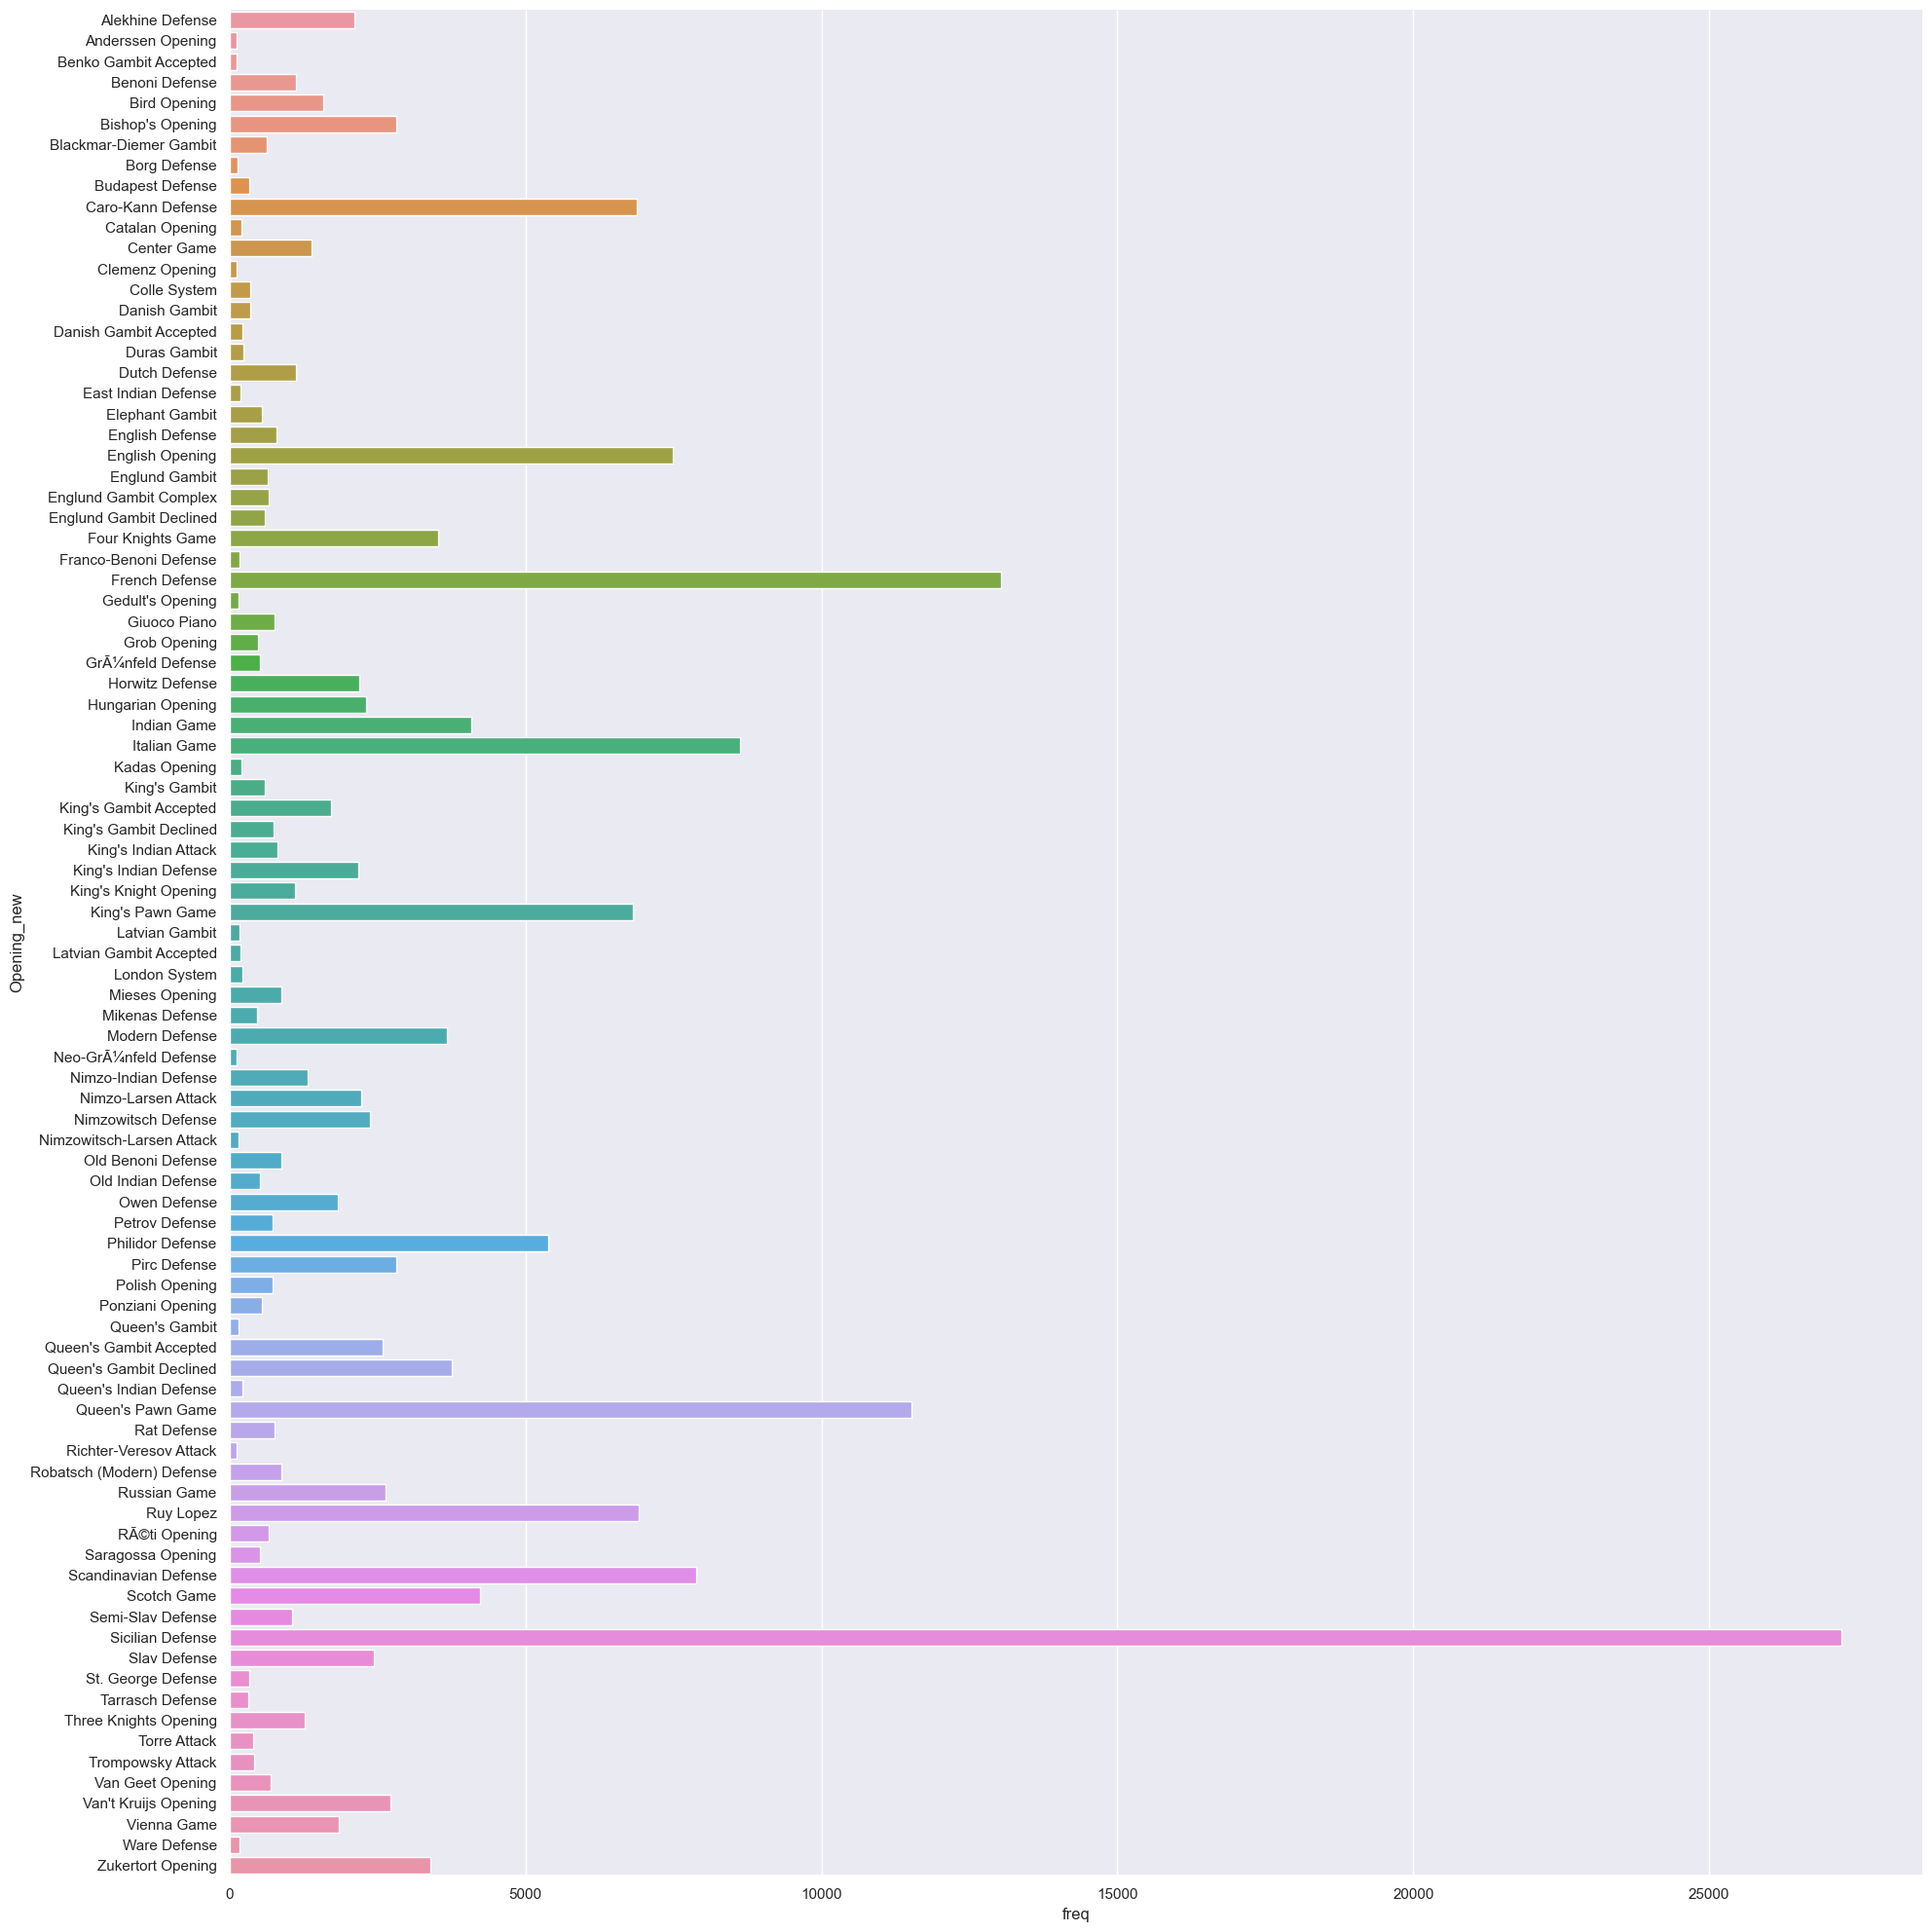

In [3]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [4]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
# frgeeq_n



In [5]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]
temp = temp[temp.Result != '*']

#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0


temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


,Opening_new,tot,win,win_rate
2302,Richter-Veresov Attack,22,8,0.363636
574,Ponziani Opening,87,33,0.37931
2352,Gedult's Opening,29,11,0.37931
69,Petrov Defense,99,39,0.393939
162,Torre Attack,193,77,0.398964
...,...,...,...,...
268,Kadas Opening,49,31,0.632653
5161,Queen's Gambit,22,14,0.636364
4419,Duras Gambit,50,33,0.66
919,Englund Gambit,110,73,0.663636


Win rate for white

In [6]:
temp = temp[temp['tot'] >500]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
51,Indian Game,1562,694,0.444302
58,Alekhine Defense,716,322,0.449721
61,Nimzo-Indian Defense,659,310,0.47041
187,Hungarian Opening,576,271,0.470486
70,Bird Opening,528,250,0.473485
2,Caro-Kann Defense,2711,1298,0.47879
6,Sicilian Defense,9658,4640,0.480431
24,French Defense,4031,1944,0.482262
14,Nimzo-Larsen Attack,775,382,0.492903
4,Queen's Pawn Game,3167,1582,0.499526


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

In [7]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]
temp1 = temp1[temp1.Result != '*']

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)

temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
48,Nimzowitsch-Larsen Attack,54,16,0.296296
919,Englund Gambit,110,33,0.3
5161,Queen's Gambit,22,7,0.318182
4419,Duras Gambit,50,16,0.32
268,Kadas Opening,49,18,0.367347
...,...,...,...,...
69,Petrov Defense,99,56,0.565657
200,Van't Kruijs Opening,451,256,0.567627
212,Mieses Opening,234,136,0.581197
2302,Richter-Veresov Attack,22,13,0.590909


Winrate for Black

In [8]:

temp1 = temp1[temp1['tot'] >500]
temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
0,Philidor Defense,800,298,0.3725
5,Horwitz Defense,553,216,0.390597
167,Semi-Slav Defense,542,218,0.402214
15,Slav Defense,989,409,0.413549
29,Queen's Gambit Declined,2127,906,0.425952
12,Ruy Lopez,1688,721,0.427133
8,Zukertort Opening,1098,469,0.42714
1,Modern Defense,1094,469,0.428702
22,King's Indian Defense,1199,529,0.441201
73,Scotch Game,939,415,0.44196


Immediately we note that at this bracket, popular openings like the Sicilian, the French, the Caro-Kann, generally have very even winrates for both sides, while openings with lop-sided winrates tend to be less popular. This is as at this level, both sides would know what openings to go for or to avoid.

In [9]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
chessdata = chessdata[chessdata.Result != '*']

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]


In [10]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))
predictors_cat_ohe

,Opening_new_Alekhine Defense,Opening_new_Anderssen Opening,Opening_new_Benko Gambit Accepted,Opening_new_Benoni Defense,Opening_new_Bird Opening,Opening_new_Bishop's Opening,Opening_new_Blackmar-Diemer Gambit,Opening_new_Borg Defense,Opening_new_Budapest Defense,Opening_new_Caro-Kann Defense,...,Opening_new_St. George Defense,Opening_new_Tarrasch Defense,Opening_new_Three Knights Opening,Opening_new_Torre Attack,Opening_new_Trompowsky Attack,Opening_new_Van Geet Opening,Opening_new_Van't Kruijs Opening,Opening_new_Vienna Game,Opening_new_Ware Defense,Opening_new_Zukertort Opening
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [12]:
# chessdata.info()
chessdata['ELO Diff'] = chessdata['WhiteElo'] - chessdata['BlackElo']
chessdata['Ave ELO']=.5*(chessdata['WhiteElo'] +chessdata['BlackElo'])
chessData_num = chessdata[['ELO Diff','Ave ELO']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)
predictors_cat_ohe[['ELO Diff', 'Ave ELO']] = chessData_num
predictors_cat_ohe['res'] = chessData_res
predictors_cat_ohe = predictors_cat_ohe.dropna()
predictors_cat_ohe

C:\Users\rinoa\AppData\Local\Temp\ipykernel_8708\3584876383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chessdata['ELO Diff'] = chessdata['WhiteElo'] - chessdata['BlackElo']
C:\Users\rinoa\AppData\Local\Temp\ipykernel_8708\3584876383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chessdata['Ave ELO']=.5*(chessdata['WhiteElo'] +chessdata['BlackElo'])


,Opening_new_Alekhine Defense,Opening_new_Anderssen Opening,Opening_new_Benko Gambit Accepted,Opening_new_Benoni Defense,Opening_new_Bird Opening,Opening_new_Bishop's Opening,Opening_new_Blackmar-Diemer Gambit,Opening_new_Borg Defense,Opening_new_Budapest Defense,Opening_new_Caro-Kann Defense,...,Opening_new_Torre Attack,Opening_new_Trompowsky Attack,Opening_new_Van Geet Opening,Opening_new_Van't Kruijs Opening,Opening_new_Vienna Game,Opening_new_Ware Defense,Opening_new_Zukertort Opening,ELO Diff,Ave ELO,res
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-108.0,1707.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-80.0,2364.0,-1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-68.0,1956.0,-1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,1790.5,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.0,1729.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-17.0,1945.5,-1
54972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1722.0,1
54973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-120.0,2092.0,0
54974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,2223.5,1


In [21]:


# Extract Response and Predictors
y = pd.DataFrame(predictors_cat_ohe['res'])
X = pd.DataFrame(predictors_cat_ohe.drop('res', axis = 1))
X = X.drop('Ave ELO', axis = 1)


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=30) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6, min_samples_leaf=30)

In [22]:
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

Train Data
Accuracy  :	 0.5678421996413628

Test Data
Accuracy  :	 0.5696701430996847



[Text(0.45075757575757575, 0.9285714285714286, 'ELO Diff <= -48.5\ngini = 0.536\nsamples = 38479\nvalue = [17793, 1484, 19202]\nclass = White'),
 Text(0.21085858585858586, 0.7857142857142857, 'ELO Diff <= -159.5\ngini = 0.511\nsamples = 11213\nvalue = [6663, 436, 4114]\nclass = Black'),
 Text(0.1111111111111111, 0.6428571428571429, 'ELO Diff <= -312.5\ngini = 0.444\nsamples = 4009\nvalue = [2774, 125, 1110]\nclass = Black'),
 Text(0.045454545454545456, 0.5, 'ELO Diff <= -733.5\ngini = 0.376\nsamples = 1138\nvalue = [864, 26, 248]\nclass = Black'),
 Text(0.020202020202020204, 0.35714285714285715, 'ELO Diff <= -844.0\ngini = 0.142\nsamples = 66\nvalue = [61, 1, 4]\nclass = Black'),
 Text(0.010101010101010102, 0.21428571428571427, 'gini = 0.064\nsamples = 30\nvalue = [29, 1, 0]\nclass = Black'),
 Text(0.030303030303030304, 0.21428571428571427, 'gini = 0.198\nsamples = 36\nvalue = [32, 0, 4]\nclass = Black'),
 Text(0.0707070707070707, 0.35714285714285715, 'Opening_new_French Defense <= 0.5

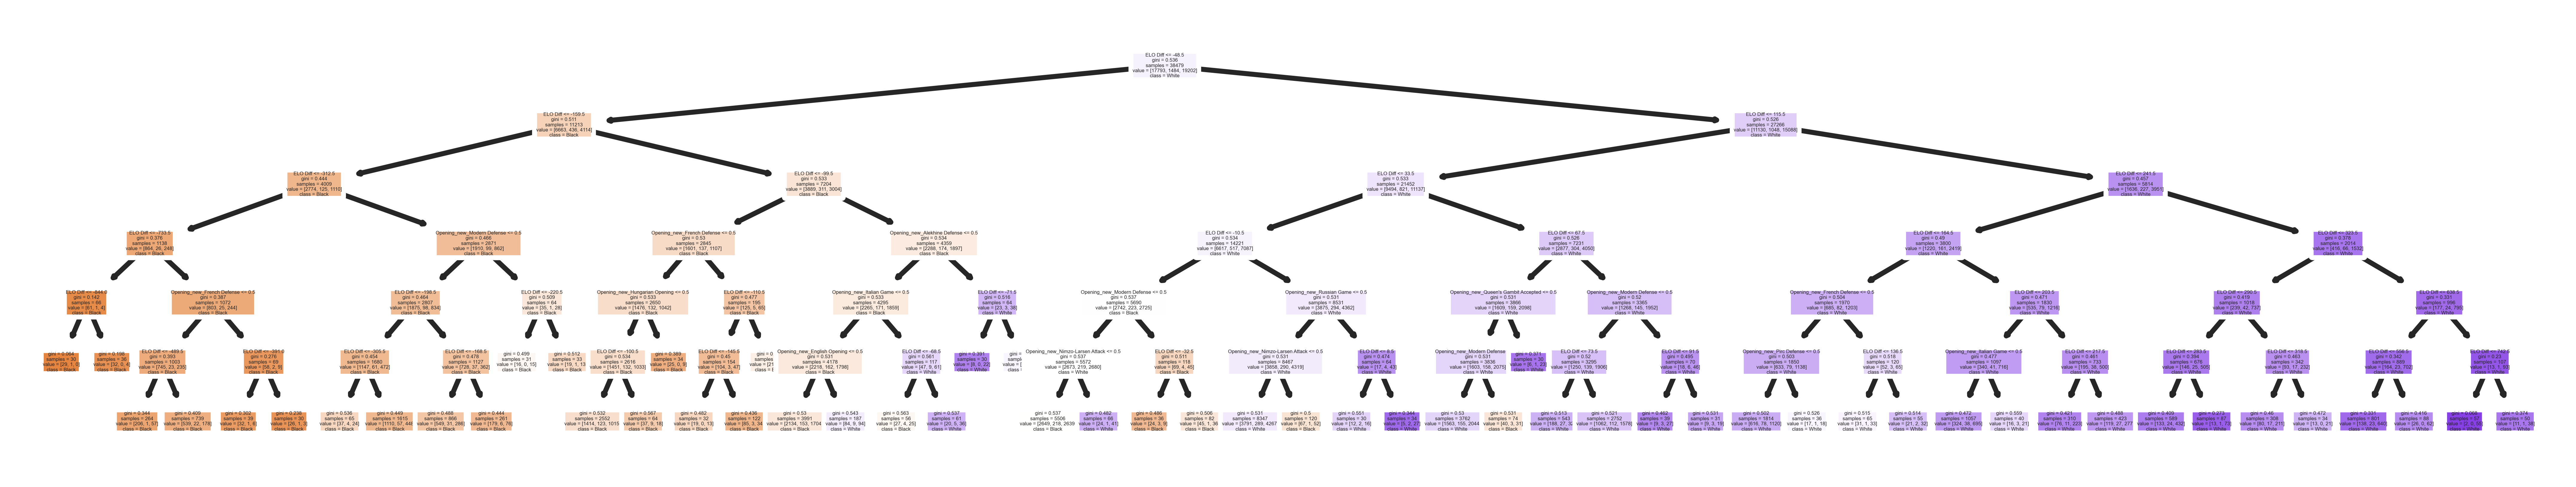

In [23]:
f = plt.figure(dpi=1200, figsize=(9,1.5),linewidth=.1)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])



![The Philidor Defence](highphoto/high_left.png "Title")

![The Philidor Defence](highphoto/high_right.png "Title")

When one side is more than about 140 points stronger than the other, we see that they win more than 2/3 of the time, and dominate almost every opening.
When black is stronger than white: Black: c ;White: Modern Defense,Alekhine Defense,Italian Game

About equal strength: White: Alekhine, Black:French


White stronger than black: Black seems to hold out better with the French Defense and Pirc Defence(though still with a negative winrate)

The Modern Defense seems to be a toss up, going to either side sometimes. This may be due to the sharpness of the position, that is that the position is delicate in a sense that a slight inaccuracy may change the outcome of a game.
    


![The Philidor Defence](highphoto/left.png "Title")

![The Philidor Defence](highphoto/right.png "Title")